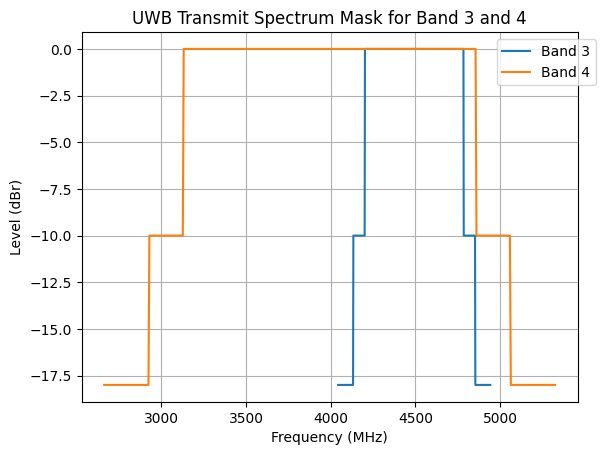

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def spectrum_mask(f, f_center, bandwidth):
    mask = np.piecewise(f,
                        [((f >= f_center - 0.8 * bandwidth) & (f < f_center - 0.65 * bandwidth)) |
                         ((f > f_center + 0.65 * bandwidth) & (f <= f_center + 0.8 * bandwidth)),
                         (f >= f_center - 0.65 * bandwidth) & (f <= f_center + 0.65 * bandwidth)],
                        [-10, 0, -18])
    return mask

# Given values
center_freq_band3 = 4492.8  # MHz
bandwidth_band3 = 449.2  # MHz

center_freq_band4 = 3993.6  # MHz
bandwidth_band4 = 1331.2  # MHz

# Frequency ranges
f_band3 = np.linspace(center_freq_band3 - bandwidth_band3, center_freq_band3 + bandwidth_band3, 500)
f_band4 = np.linspace(center_freq_band4 - bandwidth_band4, center_freq_band4 + bandwidth_band4, 500)

# Spectrum mask levels
mask_level_band3 = spectrum_mask(f_band3, center_freq_band3, bandwidth_band3)
mask_level_band4 = spectrum_mask(f_band4, center_freq_band4, bandwidth_band4)

# Create the plot
plt.figure()
plt.plot(f_band3, mask_level_band3, label='Band 3')
plt.plot(f_band4, mask_level_band4, label='Band 4')
plt.title('UWB Transmit Spectrum Mask for Band 3 and 4')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Level (dBr)')
plt.legend(loc='upper right', bbox_to_anchor=(1.05, 1.0))  # Adjusted legend position
plt.grid(True)
plt.savefig('../figure/plotted/spectrum_mask.png')
plt.show()



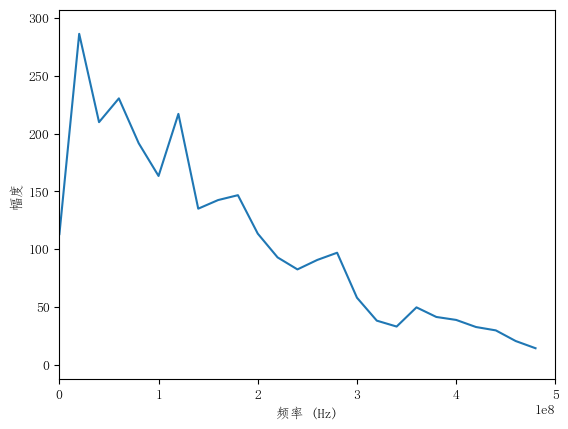

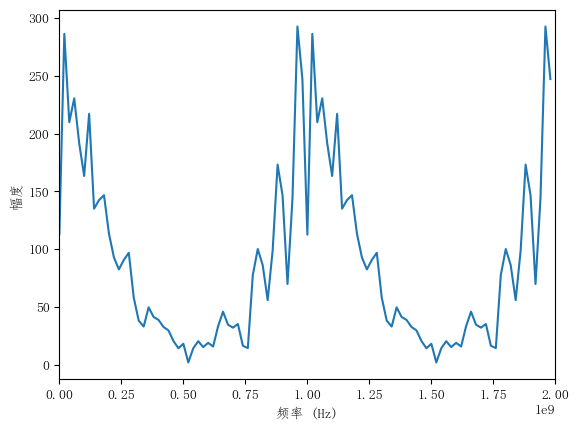

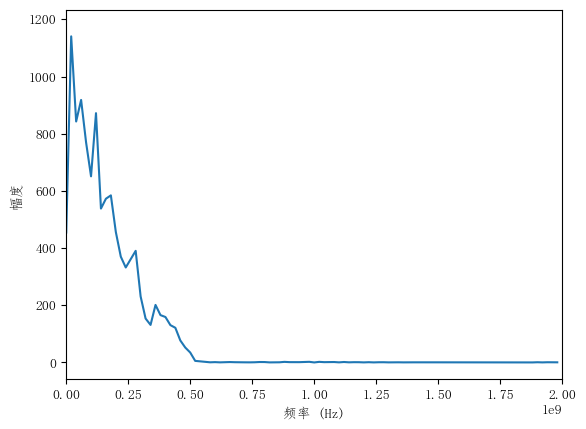

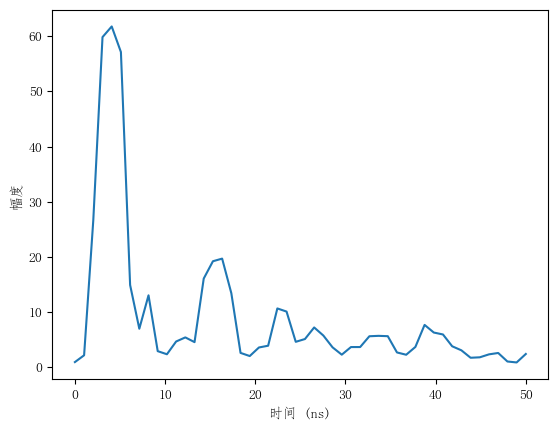

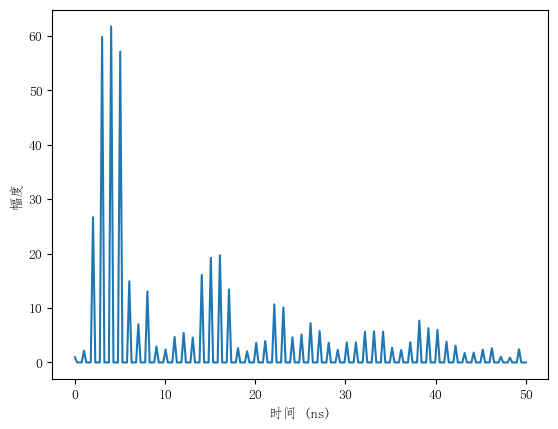

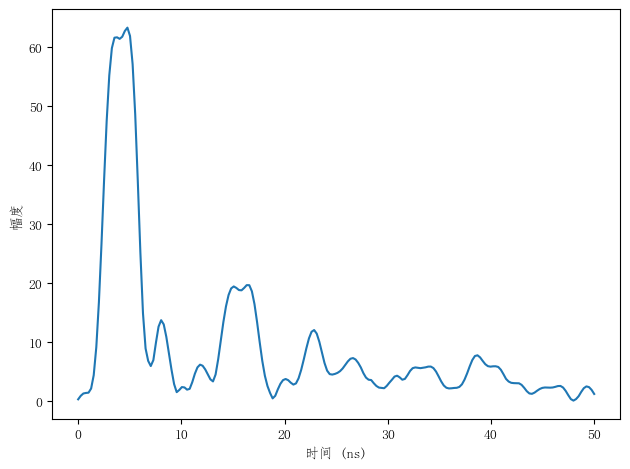

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft

# Assuming the time series data is given as:
data = [0.83065+0.48387j,2.0968+0.64516j,24.7984+9.89516j,53.9839+25.7823j,50.2177+35.9435j,33.0403+46.5968j,-5.01613+14.0565j,4.5323-5.3387j,10.1613+8.19355j,-1.1048+2.7258j,-0.016129-2.379j,4.3065+1.8548j,3.2258+4.371j,4.5726-0.14516j,10.0323-12.5806j,-3.20161-18.9597j,-18.8145-5.84677j,-13.4194+0.516129j,-1.8871-1.8226j,0.47581+2j,-0.83871+3.5081j,-3.4435+1.8871j,-7.8548+7.2339j,-6.2742+7.9274j,-4.5968+0.57258j,-5-1.1774j,-7.1855+0.83065j,-5.3952+2.0403j,-3.629-0.10484j,-2.2097+0.64516j,-2.0403+3.0645j,-3.1371+1.9355j,-5.0645-2.4839j,-4.9677-2.8226j,-4.7661-3.0403j,-2.0081-1.8145j,-1.2742-1.9032j,-1.2823-3.4758j,-4.0323-6.5565j,-4.9113-3.9677j,-5.2419-2.8387j,-3.5806-1.3387j,-2.8387-1.2258j,-1.4677-0.94355j,-1.1694-1.4032j,-2.25-0.71774j,-2.2419-1.3387j,-0.66129-0.83871j,-0.8871+0.1129j,-2.4274-0.1129j]

# Ensure that the Chinese font is set properly
plt.rcParams['font.sans-serif'] = ['FangSong']  # Set the font to SimHei or another font that supports Chinese characters
plt.rcParams['axes.unicode_minus'] = False  # Ensure that the minus sign is displayed properly

# Function to upsample and interpolate the data
def interpolate_data(data, upsample_factor, cutoff_frequency):
    # Zero-padding
    zero_padded_data = np.zeros(len(data) * upsample_factor, dtype=complex)
    zero_padded_data[::upsample_factor] = data
    
    # Sinc function for interpolation
    t = np.arange(-len(zero_padded_data)//2, len(zero_padded_data)//2) * 1e-9
    sinc_func = np.sinc(t*cutoff_frequency / upsample_factor)
    
    # Convolution to interpolate
    interpolated_data = np.convolve(zero_padded_data, sinc_func, mode='same')
    
    return zero_padded_data, interpolated_data

# Upsample and interpolate
upsample_factor = 4
cutoff_frequency = 1e9
zero_padded_data, interpolated_data = interpolate_data(data, upsample_factor,cutoff_frequency)

# FFT to get frequency domain representation
freq_data = fft(data)
freq_zero_padded_data = fft(zero_padded_data)
freq_interpolated_data = fft(interpolated_data)

# Frequency values for plotting
freqs = np.fft.fftshift(np.fft.fftfreq(len(data))) * (1/1e-9)  # Adjusted for 1 ns sampling rate
upsampled_freqs = np.fft.fftshift(np.fft.fftfreq(len(zero_padded_data))) * (upsample_factor/1e-9)
interpolated_freqs = np.fft.fftshift(np.fft.fftfreq(len(interpolated_data))) * (upsample_factor/1e-9)


plt.figure(0)
# plt.title('原始频率域')
plt.plot(freqs, np.abs(np.fft.fftshift(freq_data)))  # fftshift for frequency data as well
plt.xlabel('频率 (Hz)')
plt.ylabel('幅度')
plt.xlim([0, 0.5 * (1/1e-9)])
plt.savefig('../figure/plotted/interpolation/freq.png')

plt.figure(1)
# plt.title('零填充后的频率域')
plt.plot(upsampled_freqs, np.abs(np.fft.fftshift(freq_zero_padded_data)))
plt.xlabel('频率 (Hz)')
plt.ylabel('幅度')
plt.xlim([0, 0.5 * (upsample_factor/1e-9)])
plt.savefig('../figure/plotted/interpolation/zero_freq.png')

plt.figure(2)
# plt.title('Sinc插值后的频率域')
plt.plot(interpolated_freqs, np.abs(np.fft.fftshift(freq_interpolated_data)))
plt.xlabel('频率 (Hz)')
plt.ylabel('幅度')
plt.xlim([0, 0.5 * (upsample_factor/1e-9)])
plt.savefig('../figure/plotted/interpolation/sinc_freq.png')

plt.figure(3)
# plt.title('原始时域')
plt.plot(np.linspace(0,50,len(data)),np.abs(data))  # fftshift for frequency data as well
plt.xlabel('时间 (ns)')
plt.ylabel('幅度')
plt.savefig('../figure/plotted/interpolation/time.png')

plt.figure(4)
# plt.title('零填充后的时域')
plt.plot(np.linspace(0,50,len(zero_padded_data)),np.abs(zero_padded_data))
plt.xlabel('时间 (ns)')
plt.ylabel('幅度')
plt.savefig('../figure/plotted/interpolation/zero_time.png')

plt.figure(5)
# plt.title('Sinc插值后的时域')
plt.plot(np.linspace(0,50,len(zero_padded_data)),np.abs(interpolated_data))
plt.xlabel('时间 (ns)')
plt.ylabel('幅度')
plt.savefig('../figure/plotted/interpolation/sinc_time.png')

plt.tight_layout()

plt.show()

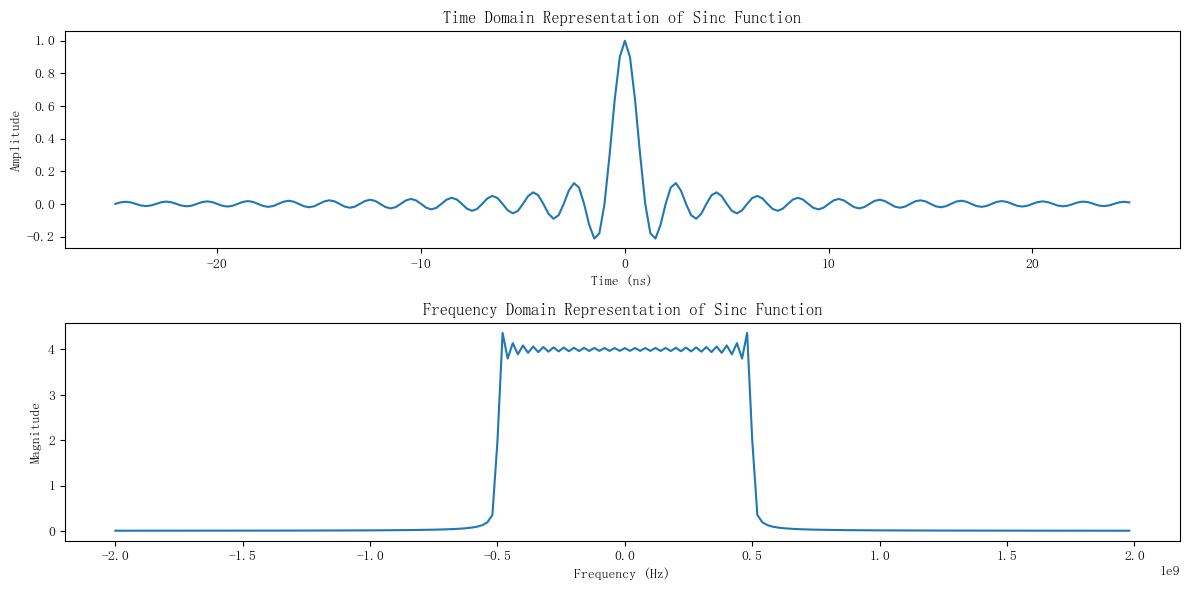

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
upsample_factor = 4  # Upsample factor
length = 50*upsample_factor  # length of the sinc function
cutoff_frequency = 1e9  # cutoff frequency of the sinc function

# Time domain representation
t = np.arange(-length//2, length//2)*1e-9  # time variable (in samples)
t_ns = t*1e9 / (upsample_factor)  # convert to nanoseconds
sinc_func = np.sinc(t / upsample_factor * cutoff_frequency)  # sinc function

# Frequency domain representation
freq_domain = np.fft.fftshift(np.fft.fft(sinc_func))  # FFT to get frequency domain
freqs = np.fft.fftshift(np.fft.fftfreq(len(sinc_func), d=1/(upsample_factor*1e9)))  # frequencies for plotting (in Hz)

# Plotting
plt.figure(figsize=(12, 6))

# Time domain plot
plt.subplot(2, 1, 1)
plt.plot(t_ns, sinc_func)
plt.title('Time Domain Representation of Sinc Function')
plt.xlabel('Time (ns)')
plt.ylabel('Amplitude')

# Frequency domain plot
plt.subplot(2, 1, 2)
plt.plot(freqs, np.abs(freq_domain))
plt.title('Frequency Domain Representation of Sinc Function')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.savefig("../figure/plotted/interpolation/sinc.png")
plt.show()


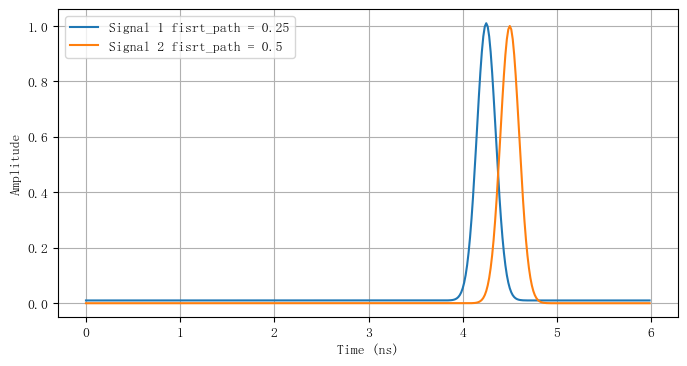

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
signal_duration = 6  # Duration of the signal in ns
sample_interval = 1/64  # Sample interval in ns

# Time axis
time = np.arange(0, signal_duration, sample_interval)

# Create two Gaussian-like signals
peak_position_1 = int(0.25 / sample_interval)
peak_position_2 = int(0.5 / sample_interval)

sigma = 0.1  # Adjust the width of the Gaussian signals

signal_1 = np.exp(-(time - 4 - time[peak_position_1])**2 / (2 * sigma**2))+0.01
signal_2 = np.exp(-(time - 4 - time[peak_position_2])**2 / (2 * sigma**2))

# Plot the signals
plt.figure(figsize=(8, 4))
plt.plot(time, signal_1, label="Signal 1 fisrt_path = 0.25")
plt.plot(time, signal_2, label="Signal 2 fisrt_path = 0.5")
plt.xlabel("Time (ns)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.savefig("../figure/plotted/first_path.png")
plt.show()


Peak time offset: -0.25 ns


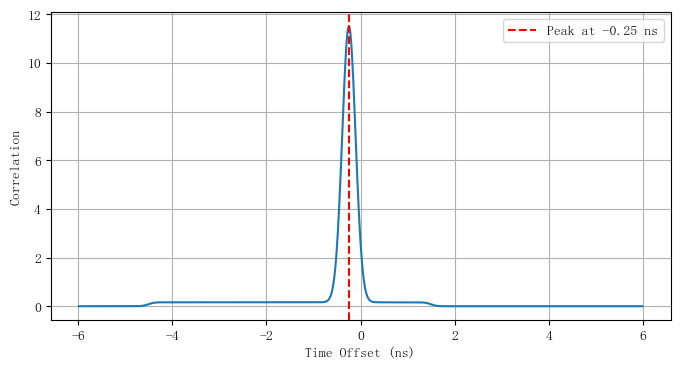

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
signal_duration = 6  # Duration of the signal in ns
sample_interval = 1/64  # Sample interval in ns

# Time axis
time = np.arange(0, signal_duration, sample_interval)

# Create two Gaussian-like signals
peak_position_1 = int(0.25 / sample_interval)
peak_position_2 = int(0.5 / sample_interval)

sigma = 0.1  # Adjust the width of the Gaussian signals

signal_1 = np.exp(-(time - 4 - time[peak_position_1])**2 / (2 * sigma**2))+0.01
signal_2 = np.exp(-(time - 4 - time[peak_position_2])**2 / (2 * sigma**2))

# Cross-correlation
correlation = np.correlate(signal_1, signal_2, mode='full')

# The 'time' axis for the correlation result
correlation_time = np.arange(-len(signal_1) + 1, len(signal_2)) * sample_interval

# Find the peak of the correlation
peak_index = np.argmax(correlation)
peak_time_offset = correlation_time[peak_index]

# Print the peak time offset
print(f'Peak time offset: {peak_time_offset} ns')

# Plot the cross-correlation
plt.figure(figsize=(8, 4))
plt.plot(correlation_time, correlation)
plt.axvline(x=peak_time_offset, color='r', linestyle='--', label=f'Peak at {peak_time_offset:.2f} ns')
plt.xlabel('Time Offset (ns)')
plt.ylabel('Correlation')
plt.legend()
plt.grid(True)
plt.savefig("../figure/plotted/correlation.png")
plt.show()



In [6]:
def upsample_and_align_cir(cir, fp, freq_s_ratio=64, need_align_time=False, need_align_phase=False):
    N = len(cir[0])  # Assuming `cir` is a 2D array, get the length of the first row

    # Initialize as a complex-valued array
    cir_up = np.zeros((len(cir), N * freq_s_ratio), dtype=complex)

    # Upsampling
    for i in range(len(cir)):
        y = cir[i]
        Y = np.fft.fft(y)
        
        # Pad the frequency-domain signal with zeros
        Y_pad = np.concatenate((Y[:N // 2], np.zeros(N * (freq_s_ratio - 1)), Y[N // 2:]))
        
        # Transform back to time domain with higher sample rate
        y_pad = np.fft.ifft(Y_pad)
        
        # Assign the upsampled array to cir_up
        cir_up[i] = y_pad[:N * freq_s_ratio]
    if (not need_align_time):
        return cir_up
    offset = np.round(fp*64).astype(int)

    aligned_cirs = []
    # index alignment using fp
    for i in range(len(cir_up)):
        aligned_cirs.append(cir_up[i][offset[i]:]) 

    # Find the shortest length among the aligned CIRs
    min_length = min([len(cir) for cir in aligned_cirs])
    
    # Trim all aligned CIRs to this minimum length
    aligned_cirs = [cir[:min_length] for cir in aligned_cirs]

    new_aligned_cirs = []
    for cir in aligned_cirs:
        trimmed_cir = np.array(cir)[:min_length]  # Assuming cir is a NumPy array
        padding_length = N * freq_s_ratio - len(trimmed_cir)
        padded_cir = np.pad(trimmed_cir, (0, padding_length), 'constant', constant_values=(0,))
        new_aligned_cirs.append(padded_cir)
    
    # Convert to numpy array for easier manipulation
    aligned_cirs = np.array(new_aligned_cirs)
    
    if (not need_align_phase):
        return aligned_cirs
    
    # Phase alignment
    index = 4*freq_s_ratio
    for i in range(len(aligned_cirs)):
        angle = np.angle(aligned_cirs[i][index])
        aligned_cirs[i] =  aligned_cirs[i] * np.exp(-1j * angle)
    
    return aligned_cirs

uwb2_exp001


/home/bobxu/Documents/zjuthesis/script/../../uwb_tracking/rti_msr_utils.py:312: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  cir = uwb_data.iloc[:, -num_cir_samples:].applymap(to_complex).to_numpy()


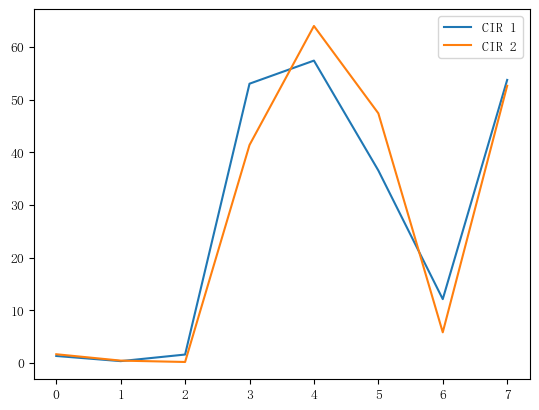

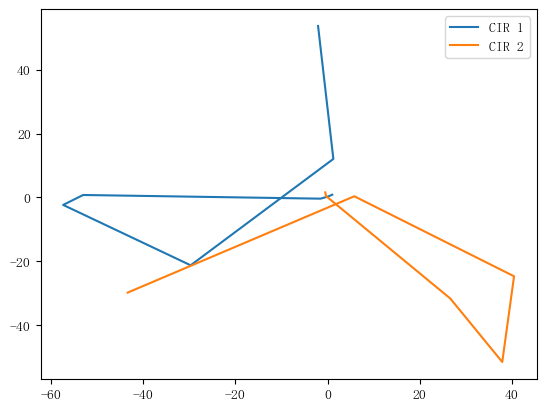

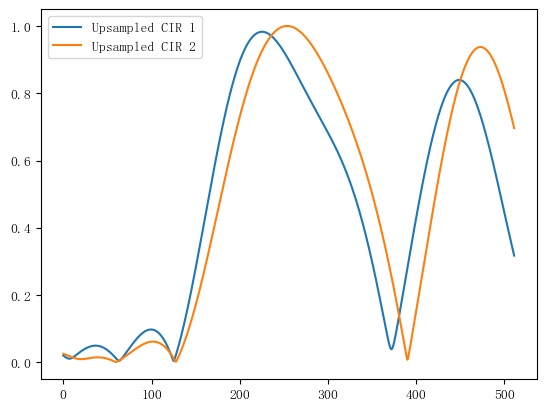

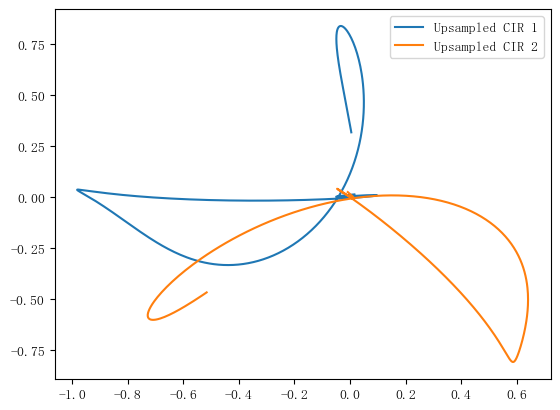

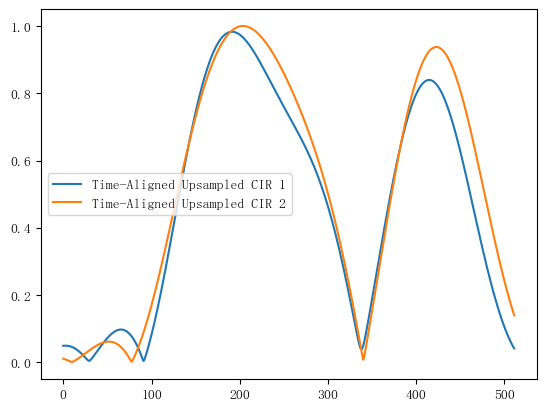

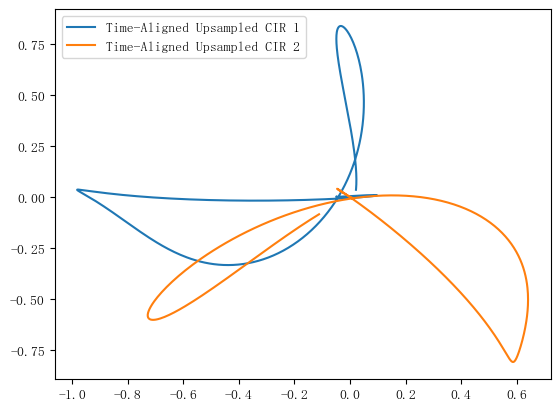

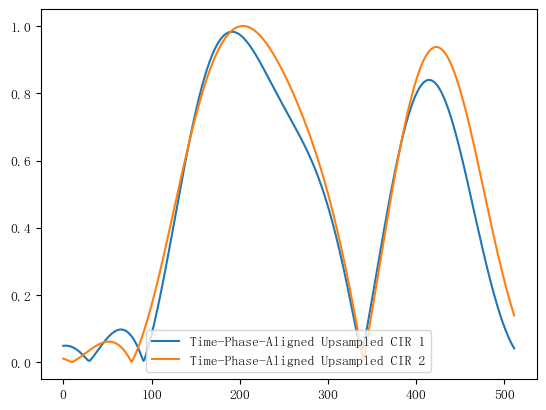

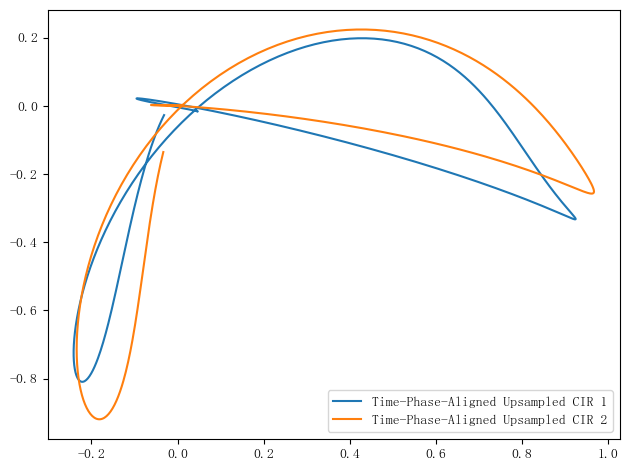

In [7]:
import sys
sys.path.append('../../uwb_tracking/')
import rti_msr_utils as rti
import matplotlib.pyplot as plt
import numpy as np

# Your data loading code here
file_path = "../../data/uwb2/uwb2_exp001.csv"
freq_s_ratio = 64
num_CIR_samples = 50

uwb2_exp001, cir, tx_id_uwb, rx_id_uwb, rx_pream_count, fp, rx_lvl, time_stamp, ground_x, ground_y = rti.load_csv_data(file_path, num_CIR_samples)
cir_up = upsample_and_align_cir(cir, fp, freq_s_ratio=freq_s_ratio)
grouped_data = rti.group_data_by_tx_rx(tx_id_uwb, rx_id_uwb, cir, cir_up, rx_pream_count, fp, rx_lvl, time_stamp, ground_x, ground_y)

plt.figure(1)
# Plot 1: Absolute values of CIR
# plt.title('Absolute Values of CIR')
plt.plot(abs(grouped_data[(0,2)]["cir"][1][:8]), label='CIR 1')
plt.plot(abs(grouped_data[(0,2)]["cir"][2][:8]), label='CIR 2')
plt.legend()
plt.savefig("../figure/plotted/align/abs_cir.png")

plt.figure(2)
# Plot 2: Real vs. Imaginary part of CIR
# plt.title('Real vs. Imaginary Part of CIR')
plt.plot(grouped_data[(0,2)]["cir"][1][:8].real, grouped_data[(0,2)]["cir"][1][:8].imag, label='CIR 1')
plt.plot(grouped_data[(0,2)]["cir"][2][:8].real, grouped_data[(0,2)]["cir"][2][:8].imag, label='CIR 2')
plt.legend()
plt.savefig("../figure/plotted/align/real_imag_cir.png")

plt.figure(3)
# Plot 3: Absolute values of CIR (upsampled)
# plt.title('Absolute Values of Upsampled CIR')
plt.plot(abs(grouped_data[(0,2)]["cir_up"][1][:8*64]), label='Upsampled CIR 1')
plt.plot(abs(grouped_data[(0,2)]["cir_up"][2][:8*64]), label='Upsampled CIR 2')
plt.legend()
plt.savefig("../figure/plotted/align/abs_up_cir.png")

plt.figure(4)
# Plot 4: Real vs. Imaginary part of CIR (upsampled)
# plt.title('Real vs. Imaginary Part of Upsampled CIR')
plt.plot(grouped_data[(0,2)]["cir_up"][1][:8*64].real, grouped_data[(0,2)]["cir_up"][1][:8*64].imag, label='Upsampled CIR 1')
plt.plot(grouped_data[(0,2)]["cir_up"][2][:8*64].real, grouped_data[(0,2)]["cir_up"][2][:8*64].imag, label='Upsampled CIR 2')
plt.legend()
plt.savefig("../figure/plotted/align/real_imag_up_cir.png")

cir_up = upsample_and_align_cir(cir, fp, freq_s_ratio=freq_s_ratio, need_align_time=True)
grouped_data = rti.group_data_by_tx_rx(tx_id_uwb, rx_id_uwb, cir, cir_up, rx_pream_count, fp, rx_lvl, time_stamp, ground_x, ground_y)
plt.figure(5)
# Plot 5: Absolute values of CIR (upsampled with time alignment)
# plt.title('Absolute Values of Time-Aligned Upsampled CIR')
plt.plot(abs(grouped_data[(0,2)]["cir_up"][1][:8*64]), label='Time-Aligned Upsampled CIR 1')
plt.plot(abs(grouped_data[(0,2)]["cir_up"][2][:8*64]), label='Time-Aligned Upsampled CIR 2')
plt.legend()
plt.savefig("../figure/plotted/align/abs_time_up_cir.png")

plt.figure(6)
# Plot 6: Real vs. Imaginary part of CIR (upsampled with time alignment)
# plt.title('Real vs. Imaginary Part of Time-Aligned Upsampled CIR')
plt.plot(grouped_data[(0,2)]["cir_up"][1][:8*64].real, grouped_data[(0,2)]["cir_up"][1][:8*64].imag, label='Time-Aligned Upsampled CIR 1')
plt.plot(grouped_data[(0,2)]["cir_up"][2][:8*64].real, grouped_data[(0,2)]["cir_up"][2][:8*64].imag, label='Time-Aligned Upsampled CIR 2')
plt.legend()
plt.savefig("../figure/plotted/align/real_imag_time_up_cir.png")

cir_up = upsample_and_align_cir(cir, fp, freq_s_ratio=freq_s_ratio, need_align_time=True, need_align_phase=True)
grouped_data = rti.group_data_by_tx_rx(tx_id_uwb, rx_id_uwb, cir, cir_up, rx_pream_count, fp, rx_lvl, time_stamp, ground_x, ground_y)

plt.figure(7)
# Plot 7: Absolute values of CIR (upsampled with time phase alignment)
# plt.title('Absolute Values of Time-Aligned Upsampled CIR')
plt.plot(abs(grouped_data[(0,2)]["cir_up"][1][:8*64]), label='Time-Phase-Aligned Upsampled CIR 1')
plt.plot(abs(grouped_data[(0,2)]["cir_up"][2][:8*64]), label='Time-Phase-Aligned Upsampled CIR 2')
plt.legend()
plt.savefig("../figure/plotted/align/abs_time_phase_up_cir.png")

plt.figure(8)
# Plot 8: Real vs. Imaginary part of CIR (upsampled with time phase alignment)
# plt.title('Real vs. Imaginary Part of Time-Phase-Aligned Upsampled CIR')
plt.plot(grouped_data[(0,2)]["cir_up"][1][:8*64].real, grouped_data[(0,2)]["cir_up"][1][:8*64].imag, label='Time-Phase-Aligned Upsampled CIR 1')
plt.plot(grouped_data[(0,2)]["cir_up"][2][:8*64].real, grouped_data[(0,2)]["cir_up"][2][:8*64].imag, label='Time-Phase-Aligned Upsampled CIR 2')
plt.legend()
plt.savefig("../figure/plotted/align/real_imag_time_phase_up_cir.png")

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()
